In [132]:
import pandas as pd
import numpy as np
import scipy

In [133]:
df = pd.DataFrame(columns=["index", "stress", "strain"])

targets = pd.read_csv("/home/sdejong/skinstression/data/targets.csv")
for i, idx in enumerate(targets["index"]):
    df_xlsx = pd.read_excel("/home/sdejong/skinstression/data/SSCURVES.xlsx", sheet_name=str(idx), usecols=["Stress", "Strain"])
    df_xlsx = df_xlsx.dropna()
    stress = df_xlsx["Stress"].to_list()
    strain = df_xlsx["Strain"].to_list()
    df.at[i, "index"] = idx
    df.at[i, "stress"] = stress
    df.at[i, "strain"] = strain
df.to_csv("data.csv", index=False)
    

In [134]:
import ast
readcsv = pd.read_csv("/home/sdejong/skinstression/notebooks/data.csv", index_col="index", converters={1:ast.literal_eval, 2:ast.literal_eval})
print(readcsv)

                                                  stress  \
index                                                      
6      [0.0, 0.00344, 0.00375, 0.00406, 0.00375, 0.00...   
8      [0.0, 0.0003125000000000003, 0.0084375, 0.0071...   
9      [0.0, 0.0190625, 0.019375, 0.019375, 0.0196875...   
10     [0.0, 0.083125, 0.04875, 0.0328125, 0.093125, ...   
11     [0.0, 0.0, 0.0, 0.0003125, 0.0003125, 0.000312...   
12     [0.0115625, 0.01125, 0.01125, 0.01218749999999...   
13     [0.0, 0.085625, 0.10718749999999999, 0.1296875...   
14     [0.0015625, 0.0021875, 0.0025, 0.0028125, 0.00...   
15     [0.0003125, 0.0003125, 0.009062500000000001, 0...   
16     [0.0, 0.030000000000000002, 0.0328125, 0.03375...   
17     [0.0, 0.00125, 0.00125, 0.0015625, 0.003125, 0...   
18     [0.0, 0.000625, 0.000625, 0.00125, 0.003437500...   
19     [0.0, 0.0, 0.00125, 0.003125, 0.0125, 0.03375,...   
20     [0.0, 0.0003125, 0.000625, 0.00468750000000000...   
21     [0.0, 0.0003125, 0.000625, 0.0006

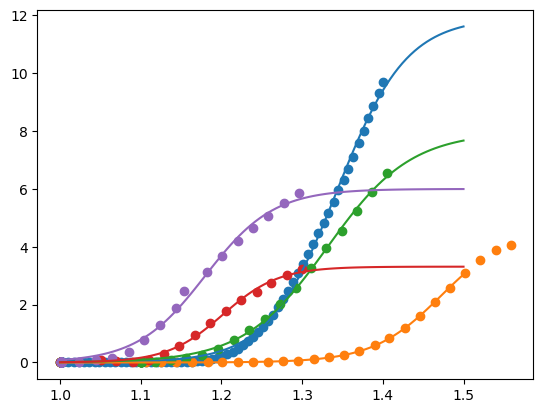

In [135]:
import matplotlib.pyplot as plt
fits = pd.read_csv("/home/sdejong/skinstression/data/targets.csv", index_col="index")
def logistic(x, a, k, xc):
    return a / (1 + np.exp(-(x-xc) * k))
x = np.linspace(1, 1.5, 100)
for idx in readcsv.index:
    l, = plt.plot(x, logistic(x, fits.loc[idx]["a"], fits.loc[idx]["k"], fits.loc[idx]["xc"]))
    plt.scatter(readcsv.loc[idx]["strain"], readcsv.loc[idx]["stress"], color=l.get_color())
    if idx > 10:
        break

In [141]:
lengths = []
for idx in readcsv.index:
    lengths.append(len(readcsv.loc[idx]["stress"]))
np.max(lengths)

857